# Projektaufgabe Wärmeleitung von Mauro Schegg und Rino Albertin:

**Erstellt am:** 
- 19.11.2024

**Die zwei Simulationsparameter:**
- $r_i = 2.5~\text{cm}, r_a  = 4.5~\text{cm}$

# 1. Rohrisolation:

**Geg.:**
- $r_i = 0.025~\text{m}$ Innenradius

- $r_a  = 0.045~\text{m}$ Aussenradius

- $T(r_i) = T_i = 80~\text{°C}$ Dirichlet-Randbedingung an der Innenseite

- $T_a = 20~\text{°C}$ Lufttemperatur an der Aussenseite (Robin-Randbedingung)

- $h = 5~\frac{\text{W}}{\text{m}^2 \cdot \text{K}}$ Wärmeübergangskoeffizient

- $k = 0.5~\frac{\text{W}}{\text{m} \cdot \text{K}}$ Wärmeleitfähigkeit

## Aufgabe 1 Handrechnung:

**Geg.:**
- $T(r)  = A~\text{ln}(\frac{r}{r_i}) + B$ 
- $r = [r_i,r_a] = [0.025~\text{m},0.045~\text{m}] $

**Ges.:**
- Lösung $T(r)$

**Visualisierung:**

Text(0.5, 0.92, 'Plot von T(r) für A=1,B=0')

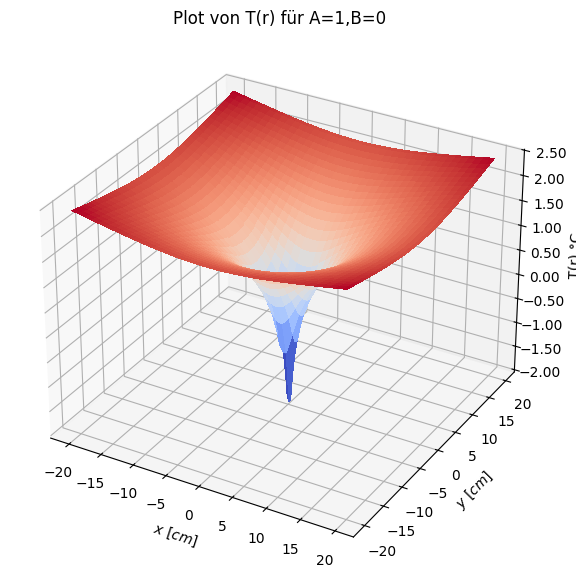

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

ri = 2.5  # Innenradius [cm]

# Einstellungen für die Anzeige
X = np.arange(-20, 20, 0.25)
# Ohne null wegen des ln
X = X[X != 0]
Y = np.arange(-20, 20, 0.25)
Y = Y[Y != 0]
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
T = np.log(R / ri)

# Plot der Figur
surf = ax.plot_surface(X, Y, T, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter("{x:.02f}")
ax.zaxis.label.set_rotation(90)

ax.set_xlabel("$x~[cm]$")
ax.set_ylabel("$y~[cm]$")
ax.set_zlabel("T(r) °C")
plt.title("Plot von T(r) für A=1,B=0")

**Erkenntnis durch die Visualisierung:**
- Der natürliche Logarithmus würde die Funktion für einen Radius gegen 0 unphysikalisch machen, da die Temperatur gegen minus unendlich gehen würde. Der Radius ist jedoch beim Innenradius begrenzt, was zu keinem Problem führt $\text{ln}(1) = 0.$ 

**Rechnung:**

Berechnung von B mit Randbedingung 1:

$$\text{RB1:}~T(r_i) = 353~\text{K} $$
$$T(r_i)  = A \cdot \text{ln}(\frac{r_i}{r_i})+B = 353~\text{K} => B = 353~\text{K}$$
$$T(r_a)  = A \cdot\text{ln}(\frac{r_a}{r_i})+ 353~\text{K}$$

Berechnung der Wärmestromdichten:
$$q_{conv} = -h \cdot (T_a-T(r_a))$$
$$q_{cond} = -k \cdot \frac{\partial{T}}{\partial{r}}$$

Berechnung von A für $r_a = 0.045~\text{m}$ mit Randbedingung 2:
$$\text{RB2:}~q_{cond}~|_{r_a} = q_{conv} $$
$$-k \cdot \frac{\partial{T}}{\partial{r}}~|_{r_a} = -h(T_a-T(r_a)) $$
$$-k \cdot A \cdot \frac{1}{r_a} = -h(T_a-A \cdot\text{ln}(\frac{r_a}{r_i})-353~\text{K})$$
$$A= \frac{-h \cdot 60~\text{K}}{h \cdot \text{ln}(\frac{r_a}{r_i})+\frac{k}{r_a}} = -21.4~\text{K}$$

**Lösung:**
- $T(r) = -21.4~\text{K} \cdot \text{ln}(\frac{r}{r_i}) + 353.15~\text{K}$

**Visualisierung der Lösung:**

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

# Innen- und Außenradius
ri = 0.025  # Innenradius [m]
ra = 0.045  # Außenradius [m]

# Polarkoordinaten
theta = np.linspace(0, 2 * np.pi, 500)  # Winkel von 0 bis 2π
r = np.linspace(ri, ra, 500)  # Radialer Bereich von ri bis ra

# Meshgrid für Polarkoordinaten
R, THETA = np.meshgrid(r, theta)

# Umwandlung in kartesische Koordinaten
X = R * np.cos(THETA)
Y = R * np.sin(THETA)

# Berechnung des Radius R und der Temperatur T(r)
T = -21.4 * np.log(R / ri) + 80 

# Plot der Oberfläche
surf = ax.plot_surface(X * 100, Y * 100, T, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Achsenformatierung
ax.zaxis.set_major_formatter("{x:.02f}")
ax.set_xlabel("$x~[cm]$")
ax.set_ylabel("$y~[cm]$")
ax.set_zlabel("T(r) °C")
plt.title("Temperaturabfall von T(r)")

# Symmetrische Achsenlimits
ax.set_xlim([-5, 5])  # x-Achse in cm
ax.set_ylim([-5, 5])  # y-Achse in cm
ax.set_box_aspect([1, 1, 0.7])  # Seitenverhältnis für X, Y, Z


Text(0.5, 1.0, 'Temperaturverlauf mit Handrechnung')

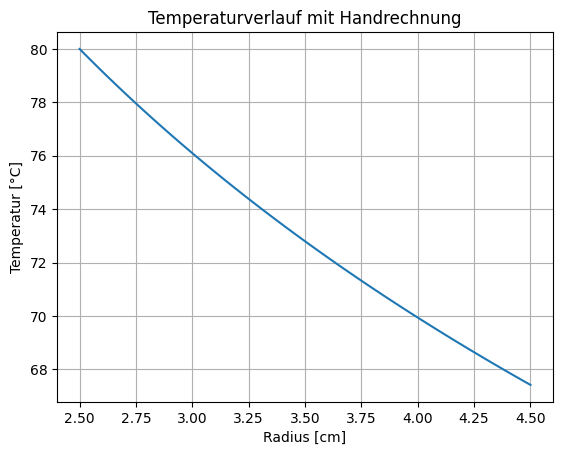

In [59]:
T = lambda r: -21.4 *np.log(r/0.025)+80
r = np.linspace(0.025,0.045)
plt.plot(r*100,T(r))
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Temperaturverlauf mit Handrechnung")

#### Beobachtung bei der Exploration:

Bei dem Versuch für grössere $r_a$ den Temperaturverlauf mit der Formel
$$T(r) = -21.4~\text{K} \cdot \text{ln}(\frac{r}{r_i}) + 353.15~\text{K}$$ 
zu berechnen wurde erkannt, dass die Temperatur für grosse $r_a$ unter $T_a$ sinkt, dies würde in der Realität nicht passieren. Wird $T(r)$ bei $r_a = 1~\text{m}$ berechnet ist die Lösung $T(r) = -15.8358 \cdot \text{ln}(\frac{r_a}{r_i})+353.15~\text{K}.$ Dieses Verhalten wird im nachfolgenden Plot visualisiert. 

Die Temperatur bei AP = 1m am Rand ist 21.584°C


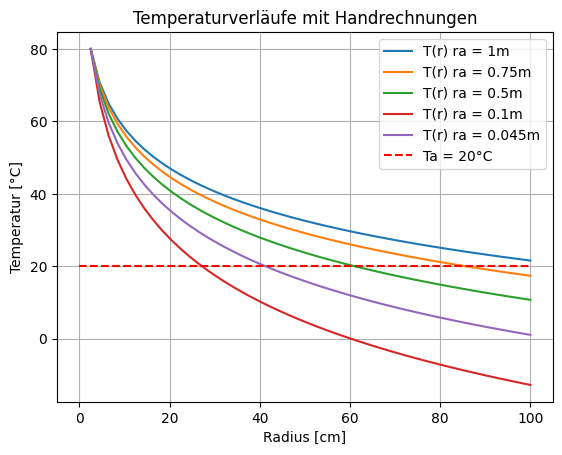

In [60]:
# T(r) beim Arbeitspunkt ra = 1 m
T1m = lambda r: -15.8358 *np.log(r/0.025)+80
# T(r) beim Arbeitspunkt ra = 0.5 m
T5 = lambda r: -18.775 *np.log(r/0.025)+80
# T(r) beim Arbeitspunkt ra = 0.75 m
T75 = lambda r: -16.9754 *np.log(r/0.025)+80
# T(r) beim Arbeitspunkt ra = 0.1 m
T01 = lambda r: -25.1436 *np.log(r/0.025)+80

# ra von ri bis 1m
r1 = np.linspace(0.025,1)
plt.plot(r1*100,T1m(r1),label="T(r) ra = 1m")
plt.plot(r1*100,T75(r1),label="T(r) ra = 0.75m")
plt.plot(r1*100,T5(r1),label="T(r) ra = 0.5m")
plt.plot(r1*100,T01(r1),label="T(r) ra = 0.1m")
plt.plot(r1*100,T(r1),label="T(r) ra = 0.045m")
plt.hlines(y=20,xmin=0,xmax=100,colors="red",linestyles="--",label=f"Ta = 20°C")
# Ausgabe der Randtemperatur.
print(f"Die Temperatur bei AP = 1m am Rand ist {round(min(T1m(r1)),3)}°C")
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Temperaturverläufe mit Handrechnungen")
plt.legend()

**Vergleich dieser Beobachtung mit Comsol:**

In [61]:
import pandas as pd
# Daten Comsol für 1m
df1m = pd.read_csv("Daten/Rohrisolation/Data_A1_Arbeitspunkt.csv",sep=",")

In [62]:
# Werte für den Aussenradius 1m
TA1m = df1m["T (degC)"]
x1m = len(TA1m)
r1m = np.linspace(0.025,1,x1m)

In [63]:
# Daten Comsol für 0.5m
df05m = pd.read_csv("Daten/Rohrisolation/Data_A1_Arbeitspunkt05.csv",sep=",")

In [64]:
# Werte für den Aussenradius 0.5m
TA05m = df05m["T (degC)"]
x05m = len(TA05m)
r05m = np.linspace(0.025,0.5,x05m)

In [65]:
# Daten Comsol für 0.1m
df01m = pd.read_csv("Daten/Rohrisolation/Data_A1_Arbeitspunkt01.csv",sep=",")

In [66]:
# Werte für den  Aussenradius 0.5m
TA01m = df01m["T (degC)"]
x01m = len(TA01m)
r01m = np.linspace(0.025,0.1,x01m)

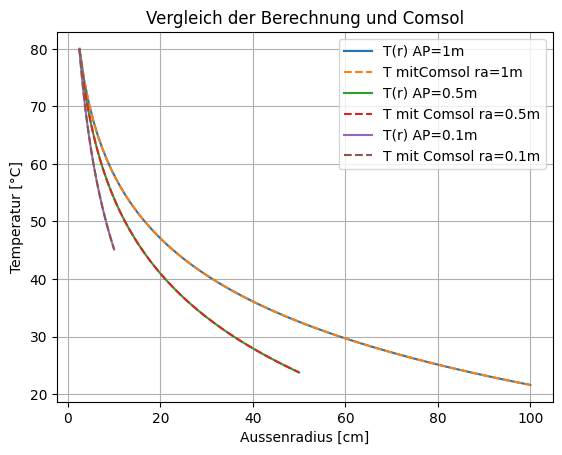

In [67]:
plt.plot(r1m*100,T1m(r1m),label="T(r) AP=1m")
plt.plot(r1m*100,TA1m,label="T mitComsol ra=1m",linestyle="--")
plt.plot(r05m*100,T5(r05m),label="T(r) AP=0.5m")
plt.plot(r05m*100,TA05m,label="T mit Comsol ra=0.5m",linestyle="--")
plt.plot(r01m*100,T01(r01m),label="T(r) AP=0.1m")
plt.plot(r01m*100,TA01m,label="T mit Comsol ra=0.1m",linestyle="--")
plt.title("Vergleich der Berechnung und Comsol")
plt.ylabel("Temperatur [°C]")
plt.xlabel("Aussenradius [cm]")
plt.grid()
plt.legend()

**Schlussfolgerung:**

Auch mit Comsol lässt sich die Beobachtung, dass bei unterschiedlicher Isolationsdicke der gesamte Temperaturverlauf durch die Isolation geändert wird bestätigen.

##### Begründung dieser Beobachtung:

**Wärmewiderstände:**
$$
R_{\text{th}} =  \frac{\text{ln}(r_a/r_i)}{2 \pi k l}
$$
 
$$
R_s = \frac{1}{2 \pi r_a l h}
$$
 
Gesamtwärmewiderstand:
$$
R_g = R_{th} + R_s
$$

In [68]:
ri = 0.025 # [m] Innendurchmesser
h = 5 # [W/(m^2*K)] Wärmeübertragungskoeffizient
Ti = 353.15 # [K] Randbedingung innen
Ta = 293.15 # [K] Umgebungdtemperatur
k = 0.5 # [W/(m*K)] Wärmeleitfähigkeit
l = 1 # [m] Länge des Rohrs

In [69]:
rg = np.linspace(0.025,1,1000)

In [70]:
Rth = np.log(rg/ri)/(2*np.pi*k*l)
Rs = 1/(2*np.pi*rg*l*h)
Rg = Rth+Rs

In [71]:
plt.plot(rg*100,Rg)
plt.title("Plot des Gesamtwiderstandes abhängig vom Aussenradius ra")
plt.ylabel("Gesamtwärmewiderstand [K/W]")
plt.xlabel("Aussenradius [cm]")
plt.grid()

**Berechnung des Temperaturgradienten:**

$$
\dot{Q}_{th} = \frac{\Delta T}{R_{th}} = \frac{2 \pi k l \Delta{T}}{\text{ln}(r_a/r_i)} = -k A \frac{\partial T}{\partial r}
$$

Daraus folgt:
$$
\frac{\partial T}{\partial r} = \frac{T_i -T_a}{-\text{ln}(r_a/r_i) \cdot r}
$$

In [72]:
r_agrad = [0.1, 0.25, 0.5, 0.75] # Aussenradius in [m]
dT =[]
rgrad = []
dTfunc = lambda ra,r: 60/(-np.log(ra/ri)*r)
for i in range(len(r_agrad)):
	r = np.linspace(0.0251,r_agrad[i],10000)
	rgrad.append(r)
	dT.append(dTfunc(r_agrad[i],r))

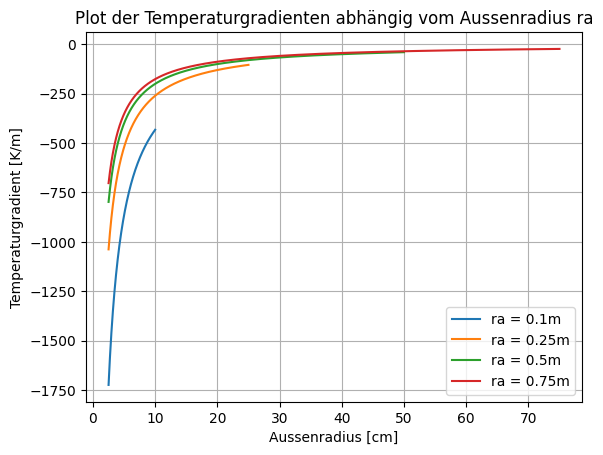

In [73]:
plt.plot(rgrad[0]*100,dT[0],label="ra = 0.1m")
plt.plot(rgrad[1]*100,dT[1],label="ra = 0.25m")
plt.plot(rgrad[2]*100,dT[2],label="ra = 0.5m")
plt.plot(rgrad[3]*100,dT[3],label="ra = 0.75m")
plt.title("Plot der Temperaturgradienten abhängig vom Aussenradius ra")
plt.ylabel("Temperaturgradient [K/m]")
plt.xlabel("Aussenradius [cm]")
plt.grid()
plt.legend()

**Schlussfolgerung:**

Durch die Bestimmung des Temperaturgradienten zeigt sich, dass der Faktor $\text{ln}(r_a/r_i)$ bei gleichem $r$ unterschiedlich sein kann. Daraus ergibt sich, dass der Temperaturgradient an einem bestimmten Punkt nicht nur vom Ort des Punktes abhängt, sondern auch von der Gesamtdicke der Isolation.
$$
\frac{\partial T}{\partial r} = \frac{T_i -T_a}{-\text{ln}(r_a/r_i) \cdot r}
$$


## Aufgabe 2 Comsol 1D Axialsymmetrisch:

In [74]:
# Einlesen der Daten mit pandas
df1 = pd.read_csv("Daten/Rohrisolation/Daten1D.csv",sep=";")

Text(0.5, 1.0, 'Temperaturverlauf 1D Axialsymmetrisch')

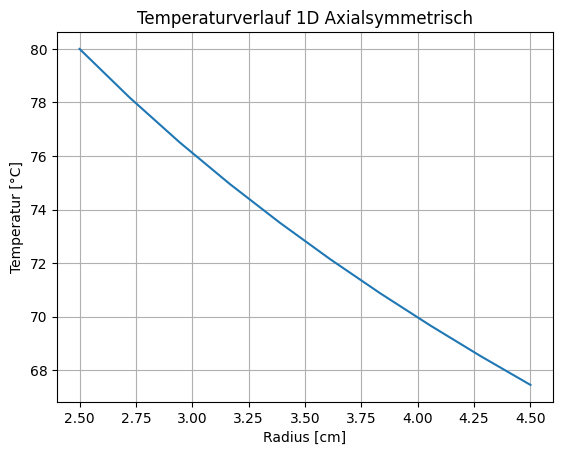

In [75]:
# Plot des Temperaturverlaufes
plt.plot(df1["R"]*100,df1["T"])
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.grid()
plt.title("Temperaturverlauf 1D Axialsymmetrisch")

## Aufgabe 3 Comsol 2D:

In [76]:
df2 = pd.read_csv("Daten/Rohrisolation/Daten2D.csv",sep=";")

Text(0.5, 1.0, 'Temperaturverlauf 2D entlang einem radial Strich')

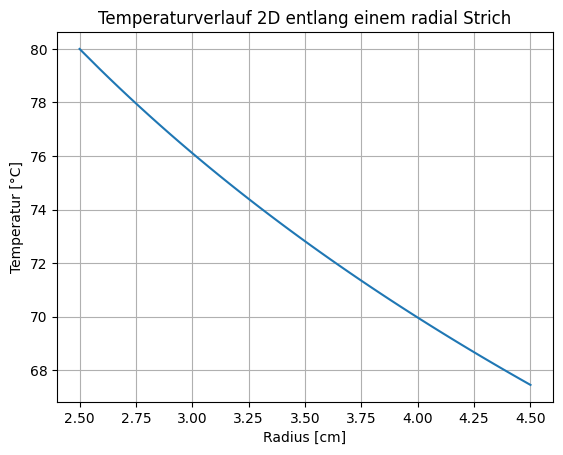

In [77]:
plt.plot(df2["R"]*100,df2["T"])
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Temperaturverlauf 2D entlang einem radial Strich")

## Aufgabe 4 Vergleich der drei Kurven:

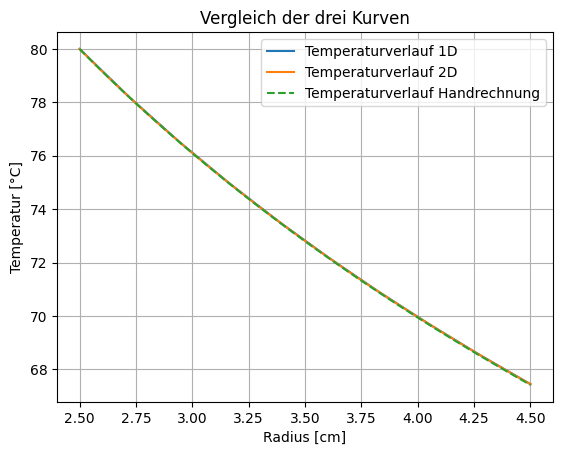

In [78]:
r = np.linspace(0.025,0.045,1000)
# Plot des Temperaturverlaufs der drei Bestimmungsweg zusammen
plt.plot(df1["R"]*100,df1["T"],label="Temperaturverlauf 1D")
plt.plot(df2["R"]*100,df2["T"],label="Temperaturverlauf 2D")
plt.plot(r*100,T(r),linestyle="--",label="Temperaturverlauf Handrechnung")
plt.grid()
plt.ylabel("Temperatur [°C]")
plt.xlabel("Radius [cm]")
plt.title("Vergleich der drei Kurven")
plt.legend()

In [79]:
from sklearn.metrics import r2_score
from scipy.interpolate import interp1d

# Interpolieren von Daten1D auf die x-Werte von Daten2D
interpolator = interp1d(df1["R"], df1["T"], kind='linear', fill_value='extrapolate')
y1_interp = interpolator(df2["R"])
y1_interp = np.array(y1_interp)


In [80]:
# 
x1 = np.linspace(0.025,0.045,len(df1["R"]))
x2 = np.linspace(0.025,0.045,len(df2["R"]))
T1 = T(x1)
T2 = T(x2)

**Bestimmtheitsmass:**

In [81]:
# Vergleich 1D und 2D
r21 = r2_score(y1_interp,df2["T"])
r21

0.9999939333529381

In [82]:
# Vergleich Hand und 1D
r22 = r2_score(T1,df1["T"])
r22

0.9999804581575854

In [83]:
# Vergleich Hand und 2D
r23 = r2_score(T2,df2["T"])
r23

0.997825026940608

- Man erkennt, dass die einzelnen Linien nicht voneinander zu unterscheiden sind.
- Das hohe Bestimmtheitsmass sagt aus, dass die Kurven einen sehr ähnlichen Verlauf haben.

**Es wurde dreimal mit unterschiedlichen Methoden ein nahezu identisches Resultat erreicht. Aufgrund dessen kann mit hoher Wahrscheinlichkeit gesagt werden, dass das erstellte Modell richtig bestimmt wurde. Dies muss aber nicht bedeuten, dass die Lösung das reale Problem richtig beschreiben würde.**

## Aufgabe 5:

### Herleitung des Wärmeflusses:
 
#### Gegebene Skizze:
Die Skizze zeigt ein System mit zwei Wärmewiderständen:
- $R_{th}$: Wärmewiderstand des festen Materials
- $R_s$: Wärmewiderstand der Oberfläche (Konvektion)

![Alternativtext](./Bilder/Rohrisolation/Model.png)

#### Quelle für das Bild: Heat Transfer J. P. Holman 
---
 
#### Berechnungsart 1:
 
##### Gesamtwärmewiderstand
$$
R_{\text{th}} =  \frac{\text{ln}(r_a/r_i)}{2 \pi k l}
$$
 
$$
R_s = \frac{1}{2 \pi r_a l h}
$$
 
Gesamtwiderstand:
$$
R_g = R_{th} + R_s
$$

---
##### Herleitung des Widerstands $R_{th}$ in $[\frac{K}{W}]$
- $\dot{Q}_{th} =  -k \cdot F \cdot \frac{\partial T}{\partial r} $ Wärmefluss $[W]$
- $F(r) = 2 \cdot \pi \cdot r \cdot l$ $[m^2]$ Oberfläche durch die Wärme fliesst. 
Da der Wärmefluss konstant ist und die Oberfläche sich mit r ändert, muss die Temperaturänderung $\frac{\partial T}{\partial r}$ von innen nach aussen mit $\frac{1}{r}$ abnehmen.

$$\partial T = -\frac{\dot{Q}_{th}}{k\cdot F}~\partial r$$

$$\int_{T_i}^{T_a} 1 \,dT  = \frac{-\dot{Q}_{th}}{k 2 \pi l} \int_{r_i}^{r_a} \frac{1}{r} \, dr~\text{mit}~\dot{Q} = \text{const.}, k = \text{const.}$$

$$\Delta T = \frac{-\dot{Q}_{th}}{2  \pi k l} (\text{ln}(r_a)-\text{ln}(r_i))$$

$$
\dot{Q}_{th} = -\frac{2 \pi k l \Delta T}{\ln\left(\frac{r_a}{r_i}\right)}
$$

$$
R_{th} = \frac{-\Delta T}{\dot{Q}_{th}} = \frac{\text{ln}(r_a/r_i)}{2 \pi k l}
$$
$R_{th}$ kann nicht negativ sein! Dies wird erfüllt da das Minus durch $\Delta T = (T_a - T_i)$ wobei $T_i > T_a$ zu einem Plus wird.

---
 
##### Herleitung des Widerstands $R_s$ in $[\frac{K}{W}]$
- $A = 2 \cdot \pi \cdot r_a \cdot l$ $[m^2]$ Äussere Oberfläche an der Konvektion auftritt.
$$
\dot{Q}_{s} = h A (T_i -T_a)  = 2 \pi r_a l h \Delta T
$$
$$
R_s = \frac{\Delta T}{\dot{Q}_{s}} = \frac{1}{2 \pi r_a l h}
$$
---
##### Wärmestrom $\dot{Q}$ in $[W]$
$$
\dot{Q} = \frac{\Delta T}{R_g} = \frac{2 \pi l (T_i-T_a)}{\frac{\ln\left(\frac{r_a}{r_i}\right)}{k}+\frac{1}{r_a h}}
$$

---
##### Wärmestrom pro Längeneinheit $\dot{q}$ in $[\frac{W}{m}]$
$\dot{Q}$ mit $\frac{1}{l}$ multiplizieren, wobei $l=1~\text{m}$
$$
\dot{q} = \frac{2 \pi (T_i-T_a)}{\frac{\ln\left(\frac{r_a}{r_i}\right)}{k}+\frac{1}{r_a h}}
$$


#### Berechnungsart 2:

Fouriesches Gesetz:

- $\dot{Q} =  -k \cdot F \cdot \frac{\partial T}{\partial r} $ Wärmefluss $[W]$
- $F(r) = 2 \cdot \pi \cdot r \cdot l$ $[m^2]$ Oberfläche durch die Wärme fliesst. 
- $\Delta T$ ist hier nicht wie in der ersten Berechnungsart konstant, sondern abhängig von $r_a$

Da der Wärmefluss konstant ist und die Oberfläche sich mit $r$ ändert, muss die Temperaturänderung $\frac{\partial T}{\partial r}$ von innen nach aussen mit $\frac{1}{r}$ abnehmen.

$$\partial T = \frac{\dot{Q}}{k\cdot F}~\partial r$$

$$\int_{T_{r_i}}^{T_{r_a}} 1 \,dT  = \frac{-\dot{Q}}{k 2 \pi l} \int_{r_i}^{r_a} \frac{1}{r} \, dr~\text{mit}~\dot{Q} = \text{const.}, k = \text{const.}$$

$$\Delta T(r_a) = \frac{\dot{Q}}{2  \pi k l} (\text{ln}(r_a)-\text{ln}(r_i))$$

$$
\dot{Q} = \frac{2 \pi k l \Delta T(r_a)}{\ln\left(\frac{r_a}{r_i}\right)}
$$

**Wärmefluss pro m:** (mit l = 1 m dividieren)
$$
\dot{q} = \frac{2 \pi k \Delta T(r_a)}{\ln\left(\frac{r_a}{r_i}\right)}
$$
$$
\Delta{T}(r) = T_{r_i}-T_{r} = + 353.15~\text{K} - A \cdot \text{ln}(\frac{r}{r_i})  - 353.15~\text{K} =   -A \cdot \text{ln}(\frac{r}{r_i}) = - \frac{-h \cdot 60}{h \cdot \text{ln}(\frac{r}{r_i})+\frac{k}{r}} \cdot \text{ln}(\frac{r}{r_i})
$$

Wie so ist $\dot{Q} = \text{const.}$?
- Wenn der Wärmefluss durch die einzelnen Zwischenebenen, wie unten in der Abbildung ersichtlich, nicht konstant wäre, so würde es zu einer Abkühlung oder Erwärmung einzelner Ebenen führen. Was bedeutet, das Problem wäre nicht mehr stationär.

![Alternativtext](./Bilder/Rohrisolation/Zwischeneben.png)

[Quelle für das Bild:](https://www.tec-science.com/de/thermodynamik-waermelehre/waerme/temperaturverlaufe-und-warmestrome-durch-verschiedene-geometrien/)

#### Analytisch:

- $A = \frac{-h \cdot 60}{h \cdot \text{ln}(\frac{r_a}{r_i})+\frac{k}{r_a}}$

- $ q =  \frac{-k \cdot A}{r_a}$

- $
\dot{q} = \frac{2 \pi (T_i-T_a)}{\frac{\ln\left(\frac{r_a}{r_i}\right)}{k}+\frac{1}{r_a h}}
$

- $\Delta{T_2} = T_{r_i}-T_{r} = + 353.15~\text{K} - A \cdot \text{ln}(\frac{r}{r_i})  - 353.15~\text{K} =   -A \cdot \text{ln}(\frac{r}{r_i}) $
- $\Delta{T_1} = T_{i}-T_{a} = + 353.15~\text{K} - 293.15~\text{K} = 60~\text{K}$


In [84]:
# Funktion für die Berechnung von A für ein ra
A_cal = lambda ra: (-h*60)/(h*np.log(ra/ri)+k/ra) 

# Funktion für die Berechnung der Wärmestromdichte mit ra und A
q_cal = lambda A,ra: -k*A/ra

# Wärmefluss pro Längeneinheit über Berechnungsart1:
q_dot_cal = lambda ra: 2*np.pi*60/((np.log(ra/ri)/k)+(1/(ra*h)))

# Wärmefluss pro Längeneinheit über Berechnungsart 2:
q_dot_cal2 = lambda delT,ra: 2*np.pi*k*delT/((np.log(ra/ri)))

# Berechnug der Temperaturdifferenz
delT_cal = lambda A,ra: -A*np.log(ra/ri)

# ra von 0.0251 m bis 0.2 m
ra = np.linspace(0.0251,0.2,1000)

# Bestimmung der Werte des A Parameters
A = A_cal(ra)

# Berechnung DeltaT
delT1 = delT_cal(A,ra)

# Berechnung Wärmefluss pro Längeneinheit
q_dot = q_dot_cal(ra)
q_dot1 = q_dot_cal2(delT1,ra)

In [85]:
plt.plot(ra*100,q_dot,"*",label= "Wärmefluss mit Berechnungsart 1")
plt.plot(ra*100,q_dot1,"--", label = "Wärmefluss mit Berechnungsart 2")
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Wärmefluss abhängig von der Isolationsdicke")
plt.legend()
plt.grid()

## Aufgabe 6:

**Biot-Zahl:**
- Die Biot-Zahl gibt bei Wärmetransport durch die Oberfläche das Verhältnis des Wärmeleitwiderstandes des Festkörpers zum Wärmeübergangswiderstand des umgebenden Mediums an. 
- Bi << 1: $\Delta T$ gross bei Konvektion;
- Bi ≈ 1: keine dominante Wärmeübertragung;
- Bi >> 1: $\Delta T$ gross bei Wärmeleitung.

Dies bedeutet nicht, dass im Fall, in welchem die Bi = 1.5 ist, man sich sicher sein kann, dass überhaupt die Wärmeleitung der Konvektion überwiegt. Es hängt davon ab, wie die charakteristische Länge gewählt wurde. Die charakteristische Länge ist ein heuristischer Wert. Heuristische Werte sind Parameter, die mit begrenztem Wissen geschätzt wurden, um wahrscheinliche Aussagen zu Systemen treffen zu können. 

Was bedeutet dies? 
- Es bedeutet, dass es nicht eine richtige charakteristische Länge gibt, sondern viele mögliche. 

Wie geht man nun mit der Biot-Zahl um?
- Die Beschreibung der Wärmeleitung ist nicht ganz so einfach, wie oben angegeben. Es kann z. B., wenn die charakteristische Länge konservativ gewählt wurde und $ Bi = 15$ ist, kann mit grosser Sicherheit gesagt werden, dass $\Delta T$ bei der Wärmeleitung grösser ist als bei der Konvektion.

Eine Art, um die charakteristische Länge zu bestimmen.
- $L = \frac{\text{Volumen}}{\text{Oberfläche, durch die Wärme strömt}} = \frac{r^2 \cdot \pi \cdot l}{2 \cdot r\cdot \pi \cdot l } = \frac{r}{2}$

**Berechnungsart 1:** Für die Randoberfläche
- $Bi = \frac{h \cdot L}{k} = \frac{h \cdot \frac{r_a}{2}}{k}$

Die oben berechnete charakteristische Länge wäre eine Möglichkeit. Es wird jedoch die Definition aus der Aufgabenstellung verwendet.
- $Bi = \frac{h \cdot L}{k} = \frac{h \cdot r_a}{k}$ 
 $$\dot{q}= \frac{\Delta T \cdot \pi \cdot h \cdot r_a}{\text{ln}(r_a/r_i) \cdot Bi}$$

**Bestimmung der Charakteristischen Länge:**


In [86]:
# ra von 0.0251 m bis 1m
ra2 = np.linspace(0.0251,1,10000)

# Charakteristische Länge (Maximale Temperaturdifferenz)
L = ra2

# Berechnung der Biot-Zahl mit Formel aus Aufgabenstellung
Bi_cal = lambda L: h*(L)/k
Bi = Bi_cal(L)
Bi[-1]

np.float64(10.0)

In [87]:
plt.plot(ra2*100,Bi)
plt.ylabel("Biot Zahl")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Biot-Zahl abhängig von ra")
plt.grid()

In [88]:
A2 = A_cal(ra2)
delT3 = delT_cal(A2,ra2)

In [89]:
# Wärmefluss pro Längeneinheit mit Biot-Zahl
q_dot_cal2 = lambda delT,ra,Bi: (2*delT*np.pi*ra*h)/(np.log(ra/ri)*Bi)
q_dot2 = q_dot_cal2(delT3,ra2,Bi)

In [90]:
plt.plot(ra2*100,q_dot2)
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Wärmefluss abhängig von der Isolationsdicke mit Biot-Zahl")
plt.grid()

## Aufgabe 7:

In [91]:
# Bestimmen des Maximums mit Aufgabe 5:
maxQ1 = np.max(q_dot1)
index1 = np.argmax(q_dot1)
print(maxQ1,len(q_dot1),index1)

In [92]:
x1 = index1/len(q_dot1)*(ra.max()-ra.min())*100+2.51
print(f"Das Maximum ist bei {round(x1,2)} cm.")

In [93]:
# Bestimmen des Maximums mit Aufgabe 6:
maxQ2 = np.max(q_dot2)
index2 = np.argmax(q_dot2)
print(maxQ2,len(q_dot2),index2)

In [94]:
x2 = (index2)/len(q_dot2)*(ra2.max()-ra2.min())*100+2.51
print(f"Das Maximum ist bei {round(x2,2)} cm.")

In [95]:
plt.plot(ra2*100,q_dot2)
plt.plot(x2,maxQ2,"*")
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Bestimmung maximaler Wärmefluss")
plt.grid()

- Der maximale Wärmefluss mit 79 $[\frac{W}{m}]$  bei $r_a = 10~\text{[cm]}$ 

#### Überprüfung:
Wieso entsteht dieser kritische Radius?:
- Je dicker die Isolation, desto besser ist die Isolation, aber auch die Oberfläche wächst mit der Dicke der Isolation damit geht mehr Wärme durch Konvektion verloren.

**Gesamtwärmewiderstand:**
$$R = (\frac{\text{ln}(r_a/r_i)}{2 \pi L k}+\frac{1}{2 \pi r_a L h})$$ 

**Extremstelle aufsuchen:**
$$\frac{\partial R}{\partial r_a} = 0$$
$$r_{krit} = \frac{k}{h} = 0.1~\text{m} = 10~\text{cm} $$

**Hinreichende Bedingung:**
$$\frac{\partial^2 R}{\partial r_a^2} = \frac{-1}{2 \pi l r_a^2 k} + \frac{2}{2 \pi l r_a^3 h} $$
$$\frac{\partial^2 R}{\partial r_a^2}(r_{krit}) > 0$$
Bei $r_{krit}$ ist der Gesamtwärmewiderstand minimal damit ist der Wärmefluss maximal.

[Quelle der Formel](https://n.ethz.ch/~jgeurts/dateien/zusammenfassungen/Thermodynamik_II_Zusammenfassung.pdf)

**Schlussfolgerung:**

Da der kritische Radius (Radius mit maximalem Wärmefluss) nur von der Wärmeleitfähigkeit und dem Wärmeübergangskoeffizienten abhängig ist, sollte jedes Team einen $r_{krit}$ von $0.1~\text{m}$ erhalten. 

Bedeutet der grosse $r_{krit}$ nun, dass Isolation keinen Sinn ergibt?

Nein! Der Wert von $h$ ist sehr tief und der Wert von $k$ ist sehr hoch gewählt.

In [96]:
ra = np.linspace(0.0251,0.5)
ks = 0.04 # Wärmeleitfähigkeit realisitsche Isolation Glaswolle [W/(mK)]
print(f"Der kritischer Radius mit Glaswolle entspricht {ks/h*100} cm")

In [97]:
q_dot_cals = lambda ra: 2*np.pi*60/((np.log(ra/ri)/ks)+(1/(ra*h)))
q_dots = q_dot_cals(ra)

In [98]:
plt.plot(ra*100,q_dots)
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Wärmefluss abhängig von der Isolationsdicke bei k = 0.04")
plt.grid()

In [99]:
ktest = [0.04,0.06,0.1,0.2,0.5,0.75,1]
q_dottest = [2*np.pi*60/((np.log(ra/ri)/ktest[i])+(1/(ra*h))) for i in range(len(ktest))]

In [100]:
plt.plot(ra*100,q_dottest[0],label="Wärmefluss mit k = 0.04 W/(mK)") # Glaswolle
plt.plot(ra*100,q_dottest[1],label="Wärmefluss mit k = 0.06 W/(mK)") # Schaumgummi
plt.plot(ra*100,q_dottest[2],label="Wärmefluss mit k = 0.1 W/(mK)") # Dachpappe 
plt.plot(ra*100,q_dottest[3],label="Wärmefluss mit k = 0.2 W/(mK)") # Gipskartonplatten
plt.plot(ra*100,q_dottest[4],label="Wärmefluss mit k = 0.5 W/(mK)") # Kalkstein 
plt.plot(ra*100,q_dottest[5],label="Wärmefluss mit k = 0.75 W/(mK)") # Erdreich 20% Feucht
plt.plot(ra*100,q_dottest[6],label="Wärmefluss mit k = 1 W/(mK)") # Keramik
plt.ylabel("Wärmefluss [W/m]")
plt.xlabel("Aussenradius ra [cm] ")
plt.title("Wärmefluss abhängig von der Isolationsdicke und Wärmeleitfähigkeit")
plt.xlim(2.0, 100) 
plt.legend(loc="center right", bbox_to_anchor=(1.1, 0.5))
plt.grid()

Bei freier Konvektion lässt sich der Wärmeübergangskoeffizient für Luft näherungsweise mit der Formel:

Geschwindigkeit $v$ in $\frac{\text{m}}{\text{s}}$
$$
h = 12 \cdot \sqrt{v}+2
$$
bestimmen.

[Quelle der Formel](https://de.wikipedia.org/wiki/W%C3%A4rme%C3%BCbergangskoeffizient)

[Quelle freie Konvektion](https://help.solidworks.com/2015/english/SolidWorks/cworks/c_convection_heat_coefficient.htm?format=P&value=)

In [101]:
v = ((5-3)/12)**2
print(f"Die Geschwindigkeit für h der Aufgabe beträgt {round(v,3)} m/s = {round(v*3.6,3)} km/h")

Eine Geschwindigkeit von $0.1~\frac{\text{km}}{\text{h}}$ wird als Windstill betrachtet. 

[Quelle der Windgeschwindigkeit](https://de.wikipedia.org/wiki/Windgeschwindigkeit)

Bei erzwungener Konvektion z.B. durch Wind befinden sich der Wärmeübertragungskoeffizient im Bereich $20-300~\frac{\text{W}}{\text{m}^2 \text{K}}$

Wenn $k = 0.04~\frac{\text{W}}{\text{mK}}$ und $h = 30~\frac{\text{W}}{\text{m}^2 \text{K}}$, dann ist $r_{krit} = 0.13~\text{cm}$ 

Ein guter Wärmedämmstoff hat eine Wärmeleitfähigkeit zwischen $0.025-0.04~\frac{\text{W}}{\text{mK}}$. In der Praxis werden Rohre häufig mit Materialien wie Glaswolle oder Schaumgummi isoliert, da diese eine geringe Wärmeleitfähigkeit aufweisen und somit eine effektive Isolierung gewährleisten. Ein Material mit einer Wärmeleitfähigkeit von etwa $0.5~\frac{\text{W}}{\text{mK}}$, wie sie beispielsweise bei Kalkstein zu finden ist, wäre im Vergleich weniger effektiv, da der kritische Radius deutlich grösser ausfällt. Eine effiziente Isolierung wird erreicht, wenn der kritische Radius klein bleibt, was bei Materialien mit niedriger Wärmeleitfähigkeit der Fall ist.

[Quelle der Wärmeleitfähigkeiten](https://www.schweizer-fn.de/stoff/wleit_isolierung/wleit_isolierung.php)

**Rückrechnung zur Überprüfung des Wärmeflusses:**
- Formel siehe Aufgabe 1 oder 5.

In [102]:
rkrit = 0.1 # kritischer Widerstand [m]

In [103]:
Rth = np.log(rkrit/ri)/(2*np.pi*k*l)
Rs = 1/(2*np.pi*rkrit*l*h)
Rkrit = Rth+Rs
print(Rkrit)

In [104]:
print(f"Der minimale Gesamtwärmewiderstand beträgt {round(Rkrit,3)} K/W")

Mit der Formel aus der Aufgabe 5 für den Wärmefluss erhälten man:
$$
\dot{q} = \frac{\Delta T}{R_g l} =  \frac{2 \pi (T_i-T_a)}{\frac{\ln\left(\frac{r_a}{r_i}\right)}{k}+\frac{1}{r_a h}} 
$$


In [105]:
q_dot7 = (Ti-Ta)/(Rkrit)
print(f"Der maximale Wärmefluss beträgt {round(q_dot7,2)} W/m")

Die Werte dieser Berechnung und der Berechnung mit der Biot-Zahl stimmen überein.

Der einzige Faktor, der einen Unterschied beim maximalen Wärmefluss zwischen den Teams erzeugt, ist der unterschiedliche Innenradius.

**Werte der anderen Teams nach dieser These:**
- Team 1: $r_i = 0.021~\text{m}$
- Team 3: $r_i = 0.029~\text{m}$

In [106]:
ri1 = 0.021 
ri3 = 0.029

In [113]:
# Team 1
Rth1 = np.log(rkrit/ri1)/(2*np.pi*k*l)
Rs1 = 1/(2*np.pi*rkrit*l*h)
Rkrit1 = Rth1+Rs1
print(f"Der minimale Wärmewiderstand von Team 1 entspricht {round(Rkrit1,3)} K/W")

# Wärmefluss
q_dot71 = (Ti-Ta)/(Rkrit1)
print(f"Der maximale Wärmefluss für das Team 1 beträgt {round(q_dot71,2)} W/m")

Der minimale Wärmewiderstand von Team 1 entspricht 0.815 K/W
Der maximale Wärmefluss für das Team 1 beträgt 73.61 W/m


In [114]:
# Team 3
Rth3 = np.log(rkrit/ri3)/(2*np.pi*k*l)
Rs3 = 1/(2*np.pi*rkrit*l*h)
Rkrit3 = Rth3+Rs3
print(f"Der minimale Wärmewiderstand von Team 3 entspricht {round(Rkrit3,3)} K/W")		

# Wärmefluss 
q_dot73 = (Ti-Ta)/(Rkrit3)
print(f"Der maximale Wärmefluss für das Team 3 beträgt {round(q_dot73,2)} W/m")

Der minimale Wärmewiderstand von Team 3 entspricht 0.712 K/W
Der maximale Wärmefluss für das Team 3 beträgt 84.23 W/m


----

# 2. Durchflussmessung

In dieser Untersuchung wird ein mikrofluidisches System zur indirekten Durchflussmessung analysiert. Ziel ist es, den Durchfluss eines Fluids basierend auf der Wärmeübertragung zwischen einem beheizten Rohr und dem Fluidstrom zu bestimmen. Die Grundlage dieser Methode ist die physikalische Abhängigkeit der Temperaturverteilung entlang des Rohrs von der Durchflussrate. Ein höherer Durchfluss führt zu einer stärkeren Wärmeabfuhr, während bei einem geringeren Durchfluss die Temperatur des Rohrs stärker ansteigt. 
Das Fluid, hier Wasser, fliesst mit unterschiedlichen Durchflussraten durch das Rohr, wobei die Strömungsgeschwindigkeit im Bereich von 0.1 m/s bis 1.0 m/s variiert. Zwei Temperatursensoren an der Aussenwand des Rohres messen die Temperatur vor und nach der beheizten Zone.

<a id="zurueck"></a>

### 2.1 Methodik
Aus der Aufgabenstellung ergibt sich die Möglichkeit, eine Vielzahl von Simulationen abzubilden. Variierende Parameter sind:

- Strömungsprofil: Kolbenströmung oder Parabelströmung
- Rohrmaterial: Aluminium oder Glas
- Materialkombination: Sensoren und Wärmequelle aus demselben Material wie das Rohr oder aus unterschiedlichen Materialien
- Geometrie der Wärmequelle und Sensoren: Ring oder Kreis

Ring (2D-Axialsymmetrisch oder 3D)
- Als ein auf der Aussenwand des Rohrs angebrachtes System 
- Als vollständiger Ersatz der Rohrwand an dieser Stelle
 
Kreisförmig:
- Als äussere, auf der Oberfläche wirkende Wärmequelle
- Als fest verbaute Heizquelle, die durch den Rohrmantel reicht
- Als Stab, der durch das gesamte Rohr (einschliesslich des Fluids) reicht

<div style="display: flex; justify-content: space-between;">
  <img src="./Bilder/Durchflussmessung/3D_Ring/Geometrie_Ring.png" alt="Geometrie Ring" style="width: 30%;"/>
  <img src="./Bilder/Durchflussmessung/3D_Punkt/Geometrie_Punkt.png" alt="Geometrie Punkt" style="width: 30%;"/>
  <img src="./Bilder/Durchflussmessung/3D_Strömung/Geometrie_Stab.png" alt="Geometrie Stab" style="width: 30%;"/>
</div>

insgesamt sind somit 56 verschieden Simulationen möglich: (Tabelle im Anhang)

Für die Analyse im Bericht wurden insbesondere die praxisnahen Fälle priorisiert. Dabei wurden ein parabolisches Strömungsprofil, eine Materialkombination mit Sensoren und Wärmequelle aus demselben Material wie das Rohr sowie Konfigurationen, bei denen die Wärmequelle und Sensoren nur an der Oberfläche wirken, berücksichtigt, da dies den typischen technischen Anwendungen entspricht. Der Fouks liegt dabei auf dem Rohr aus Glas da in Mikrofluidische Systeme diese häufig für präzise Messungen in biologischen, chemischen und technischen Anwendungen eingesetzt werden. Glasrohre sind das bevorzugte Material, da sie chemisch stabil, optisch transparent und wärmeisolierend sind. Aluminiumrohre dienen als Vergleichsmaterial, um den Effekt eines gut leitenden Rohrs auf die Wärmeübertragung und die Messgenauigkeit zu untersuchen.

Die Wärmeleistung von 10.000 W/m² bzw. von 0.05 W wurde gewählt, um einen ausreichenden Temperaturunterschiede für präzise Messungen zu erzeugen, ohne unphysikalisch hohe Temperaturen im System zu riskieren. Dieser Wert stellt einen realistischen Kompromiss dar.

### 2.2 Simulationen
Die Ergebnisse werden geordnet nach den simulierten Szenarien präsentiert: 2D, 3D-Ring und 3D-Kreis. Für jede Simulation werden die Temperaturverteilungen und die Sensorwerte in Abhängigkeit von der Geschwindigkeit dargestellt. Der Vergleich zwischen Glas- und Aluminiumrohren wird auch immer aufgeführt.

#### Axialsymmetrische 2D-Simulation
Die Verwendung einer flächenbezogenen Wärmequelle (W/m²) in der 2D- und 3D-Ring-Simulation ergibt sich aus der Geometrie der Wärmequelle. Diese stellt eine gleichmssig auf der Oberfläche des Rohrs verteilte Heizquelle dar, wie sie bei Heizfolien oder ähnlichen Anwendungen vorkommt. Die Modellierung als Flächenquelle ermöglicht es, die Wärmeverteilung entlang der Rohrwand realistisch darzustellen und entspricht typischen technischen Anwendungen, bei denen die Wärme über eine grössere Fläche abgegeben wird.

Die Temperaturverteilungen entlang des Rohres für die 2D-Simulation verdeutlichen die Abhängigkeit von der Strömungsgeschwindigkeit. Mit steigender Strömungsgeschwindigkeit wird mehr Wärme durch das Fluid abgeführt, was zu einer effektiveren Kühlung des Rohres führt.
Die Wärmeübertragung ist bei Glasrohren, aufgrund der niedrigeren Wärmeleitfähigkeit, lokaler begrenzt. Aluminiumrohre hingegen zeigen eine stärkere seitliche Wärmeverteilung, wodurch die maximalen Temperaturen im Vergleich niedriger sind.

![Alu_v_01](./Bilder/Durchflussmessung/2D/Alu_01.png)
![Alu_v_1](./Bilder/Durchflussmessung/2D/Alu_1.png)
![Glas_v_01](./Bilder/Durchflussmessung/2D/Glas_01.png)
![Glas_v_1](./Bilder/Durchflussmessung/2D/Glas_1.png)

<!-- <div style="display: flex; justify-content: space-between;">
  <img src="./Bilder/Durchflussmessung/2D/Alu_01.png" alt="Alu_v_01" style="width: 50%;"/>
  <img src="./Bilder/Durchflussmessung/2D/Glas_01.png" alt="Glas_v_01" style="width: 50%;"/>
</div>
<div style="display: flex; justify-content: space-between;">
  <img src="./Bilder/Durchflussmessung/2D/Alu_1.png" alt="Alu_v_01" style="width: 50%;"/>
  <img src="./Bilder/Durchflussmessung/2D/Glas_1.png" alt="Glas_v_01" style="width: 50%;"/>
</div> -->

In [109]:
def plot_temperature_vs_velocity(file_path):
    # load data
    data = pd.read_csv(file_path, sep=r'\s{2,}', engine='python', skiprows=4)
    data.columns = [
        "Material_Index", "wassergeschwindigkeit", 
        "Temp_Alu_Sensor_1", "Temp_Alu_Sensor_2",
        "Temp_Glas_Sensor_1", "Temp_Glas_Sensor_2"
    ]

    # Filter data
    data_alu = data[data["Material_Index"] == 1]
    data_Glas = data[data["Material_Index"] == 2]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(data_alu["wassergeschwindigkeit"], data_alu["Temp_Alu_Sensor_1"], label='Aluminium Sensor 1', color="darkgreen")
    plt.plot(data_alu["wassergeschwindigkeit"], data_alu["Temp_Alu_Sensor_2"], label='Aluminium Sensor 2', color="green")
    plt.plot(data_Glas["wassergeschwindigkeit"], data_Glas["Temp_Glas_Sensor_1"], label='Glas Sensor 1', color="darkblue")
    plt.plot(data_Glas["wassergeschwindigkeit"], data_Glas["Temp_Glas_Sensor_2"], label='Glas Sensor 2', color="blue")

    # Add labels, legend, and grid
    plt.xlabel('Strömungsgeschwindigkeit (m/s)')
    plt.xlim([0.1,1.0])
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature und Strömungsgeschwindigkeit für Aluminium und Glas')
    plt.legend()
    plt.grid()

plot_temperature_vs_velocity('./Daten/Durchflussmessung/2D/Probe_Tabel.txt')
plt.title("Temperature und Strömungsgeschwindigkeit für Aluminium und Glas (2D)")
plt.show()

Der Plot zeigt, dass die Temperaturen bei Aluminium nahezu parallel verlaufen, was auf eine gleichmässige Wärmeverteilung hinweist. Bei Glas hingegen fällt die Temperatur bei einem Sensor stärker ab, was auf die geringere Wärmeleitfähigkeit und die lokal begrenzte Wärmeübertragung zurückzuführen ist. Der Sensor vor der Wärmequelle erhitzt sich auch bei niedrigen Strömungsgeschwindigkeiten überhaupt nicht und bleibt konstant bei 20 °C

#### 3D-Ring-Simulation
Die 3D-Ring-Simulation besitzt grossen Praxisbezug, da sie die typische Konfiguration eines Glasrohrs mit einer umlaufenden Heizfolie nachbildet. Diese Variante ermöglicht eine gleichmässige Erwärmung des Fluids und wird häufig in mikrofluidischen Anwendungen eingesetzt, bei denen eine präzise Temperaturkontrolle und Homogenität der Erwärmung von entscheidender Bedeutung sind.

![Alu.gif](./Bilder/Durchflussmessung/3D_Ring/Alu.gif)
![Glas.gif](./Bilder/Durchflussmessung/3D_Ring/Glas.gif)
![Alu_S.gif](./Bilder/Durchflussmessung/3D_Ring/Alu_S.gif)
![Glas_S.gif](./Bilder/Durchflussmessung/3D_Ring/Glas_S.gif)

<div style="display: flex; justify-content: space-between;">
  <img src="./Bilder/Durchflussmessung/3D_Ring/Alu_01_nah.png" alt="Alu_01_nah" style="width: 25%;"/>
  <img src="./Bilder/Durchflussmessung/3D_Ring/Alu_1_nah.png" alt="Alu_1_nah" style="width: 25%;"/>
  <img src="./Bilder/Durchflussmessung/3D_Ring/Glas_01_nah.png" alt="Glas_01_nah" style="width: 25%;"/>
  <img src="./Bilder/Durchflussmessung/3D_Ring/Glas_1_nah.png" alt="Glas_1_nah" style="width: 25%;"/>
</div>


In [110]:
plot_temperature_vs_velocity('./Daten/Durchflussmessung/3D_Ring/Probe_Tabel.txt')
plt.title("Temperature und Strömungsgeschwindigkeit für Aluminium und Glas (3D-Ring)")
plt.show()

In der 3D-Ring-Simulation nähern sich die Temperaturen der beiden Glas-Sensoren schneller an als in der 2D-Simulation. Dies könnte darauf hindeuten, dass die ringförmige Wärmequelle das Fluid homogener erwärmt, was bei höheren Strömungsgeschwindigkeiten zu einer stärkeren Reduktion des Temperaturunterschieds zwischen den Sensoren führt.

Alternativ könnten jedoch Abweichungen in der Simulation diese Unterschiede erklären. Mögliche Ursachen dafür sind eine unterschiedliche Netzauflösung, numerische Fehler, veränderte Randbedingungen oder eine ungenaue Modellierung der Wärmequelle in der 3D-Simulation.

#### 3D-Kreis-Simulation
In der 3D-Kreis-Simulation wurde eine punktuelle Wärmequelle in Watt (W) verwendet, da diese Konfiguration eine lokal konzentrierte Heizquelle darstellt. Dies simuliert reale Anwendungen wie Heizstäbe oder Laser, bei denen die Wärmeabgabe auf einen kleinen Bereich fokussiert ist. Die Modellierung als punktuelle Wärmequelle ermöglicht es, die intensiven lokalen Erwärmungseffekte präzise abzubilden, die für diese Geometrie charakteristisch sind.

Im Vergleich zur 3D-Ring-Simulation zeigt diese Konfiguration eine deutlich stärkere lokale Erwärmung, da die Wärmequelle punktueller und konzentrierter wirkt. Dies führt insbesondere bei Glasrohren zu hohen lokalen Temperaturen und stärkeren Temperaturunterschieden zwischen den Sensoren, was die Empfindlichkeit der Messung auf Durchflussänderungen erhöht. Während die maximale Temperatur in der 3D-Ring-Simulation bei 24,7 °C lag, erreicht sie hier 390 °C.

Bei Glasrohren verstärken die geringere Wärmeleitfähigkeit und die punktuelle Wärmequelle diese lokalen Effekte. Aluminiumrohre hingegen zeigen eine gleichmässigere Wärmeverteilung, wodurch die Temperaturunterschiede zwischen den Sensoren kleiner bleiben.

![Alu.gif](./Bilder/Durchflussmessung/3D_Punkt/Alu.gif)
![Glas.gif](./Bilder/Durchflussmessung/3D_Punkt/Glas.gif)

Das folgende Bild zeigt die Simulation mit einer vollständig turbulenten Strömung, die idealisiert als Kolbenströmung modelliert wurde. Auffällig ist hierbei, dass das Glasrohr noch stärker gekühlt wird. Das liegt daran, dass bei der Kolbenströmung die Strömungsgeschwindigkeit überall konstant bleibt auch direkt an der Rohrwand, dadurch kann mehr Wärme (10K) abgeführt werden.

![Glas.gif](./Bilder/Durchflussmessung/3D_Punkt/Kolbenströmung.png)

In [111]:
plot_temperature_vs_velocity('./Daten/Durchflussmessung/3D_Punkt/Probe_Tabel.txt')
plt.title("Temperature und Strömungsgeschwindigkeit für Aluminium und Glas (3D-Kreis)")
plt.show()

Auffällig an diesem Plot ist, dass sich die Temperaturverläufe der Sensoren 2 für die verschiedenen Materialien nicht mehr kreuzen, wie es in den vorherigen Beispielen der Fall war. Dies liegt an der punktförmigen Wärmequelle, die die Unterschiede in der Wärmeleitung der Materialien stärker betont. 

Die punktförmige Wärmequelle macht diese Konfiguration besonders empfindlich für die Durchflussmessung, da die Temperaturdifferenzen zwischen den Sensoren stärker auf Änderungen der Strömungsgeschwindigkeit reagieren. Allerdings kann die punktuelle Erwärmung zu höheren lokalen Temperaturschwankungen führen, die eine präzise Messung unter bestimmten Bedingungen erschweren könnten. Ferner ist zu beachten das punktuell sehr hohe Temperaturen (390°C) entstehen während das Fluid nur eine geringe erwärmung aufweist.


### 2.3 Herausforderungen der Durchflussmessung

Die Simulationen zeigen, dass die Oberflächentemperaturen des Rohrs für die indirekte Durchflussmessung genutzt werden können. Allerdings ist die exakte Berechnung des Durchflusses herausfordernd, da nur die Temperatur an der Rohrwand gemessen wird. Für eine präzise Bestimmung müssen mehrere zusätzliche Faktoren berücksichtigt werden:

- Die Erwärmung des Rohrs, die sowohl radial als auch axial erfolgt und von der Wärmeleitfähigkeit sowie der Dicke des Rohrmaterials abhängt.
- Der Wärmeübergang zwischen der Rohrwand und dem Fluid, der durch den Wärmeübergangskoeffizienten bestimmt wird.
- Der thermische Widerstand des Rohrs, der die Effizienz der Wärmeübertragung zwischen der Wärmequelle, dem Rohr und dem Fluid beeinflusst.

Um systematische Fehler zu minimieren, wird die Temperatur meist differenziell gemessen, also als Temperaturdifferenz zwischen zwei Sensoren vor und nach der Wärmequelle. Diese Methode reduziert absolute Messfehler und ermöglicht eine bessere Korrelation zwischen der Temperaturdifferenz und der Strömungsgeschwindigkeit.

Trotzdem bleiben diese komplexen Zusammenhänge eine Herausforderung, weshalb die Bestimmung des Durchflusses allein auf Basis der gemessenen Oberflächentemperatur schwierig ist.

### 2.4 Fazit

Die Simulationen verdeutlichen die Abhängigkeit der Wärmeübertragung von Strömungsgeschwindigkeit, Material und Geometrie der Wärmequelle. Die 2D bzw. 3D-Ring-Simulation zeigen eine gleichmässige Wärmeverteilung und eine hohe Praxisnähe. Die 3D-Kreis-Simulation zeigt die stärkste lokale Erwärmung und eine hohe Empfindlichkeit gegenüber Durchflussänderungen. In der Praxis wird jedoch häufiger die ringförmige Wärmequelle eingesetzt, da sie einfacher zu realisieren ist und stabilere Messungen ermöglicht.

Glasrohre eignen sich aufgrund ihrer geringeren Wärmeleitfähigkeit besonders für die lokale Messung von Durchflussänderungen, da die Temperaturdifferenz zwischen den Sensoren deutlicher und stärker lokalisiert bleibt.  Aluminium wird bevorzugt eingesetzt, wenn das Fluid erwärmt werden soll, ist jedoch in der Mikrofluidik aufgrund mangelnder chemischer Stabilität oft nicht realisierbar.

---

## Anhang

### Strömungssimulation

In dieser zusätzlichen Simulation wurde die Wärmeübertragung mit der Strömungssimulation gekoppelt, um genauere Ergebnisse zu erzielen. Dabei wurden die Sensoren und die Wärmequellen als durchgehende Stäbe modelliert, die sowohl die Rohrwand als auch das Fluid durchdringen. Die Wärmequelle wird vollständig erwärmt, nicht nur an der Rohroberfläche, da sie einen Heizstab repräsentiert. Die Simulation wurde mit dem algebraischen $ y^+ $ -Strömungsmodell  und einem groben Netz, um die Berechnungszeit zu reduzieren, durchgeführt. Dies wird insbesondere vor der Wärmequelle sichtbar, wo die Strömungsdetails nicht ausreichend aufgelöst sind. Trotz der Vereinfachungen zeigt die gekoppelte Simulation eine bessere Übereinstimmung im Temperaturverlauf mit der physikalischen Realität als das Modell ohne Strömung. Auffällig ist jedoch, dass die berechneten Temperaturen stellenweise unter 20 °C fallen, was physikalisch nicht plausibel ist und möglicherweise auf numerische Fehler oder ungeeignete Randbedingungen hinweist. Die dargestellten Bilder wechseln sich von links nach rechts ab und vergleichen die gekoppelte Strömungssimulation mit der Version ohne Strömungskopplung.
<div style="display: flex; justify-content: space-between;">
  <img src="./Bilder/Durchflussmessung/3D_Strömung/Alu_01_Heat.png" alt="Alu_01_Heat" style="width: 25%;"/>
  <img src="./Bilder/Durchflussmessung/3D_Strömung/Alu_01_Heat_oS.png" alt="Alu_01_Heat_oS" style="width: 25%;"/>
  <img src="./Bilder/Durchflussmessung/3D_Strömung/Glas_01_Heat.png" alt="Glas_01_Heat" style="width: 25%;"/>
  <img src="./Bilder/Durchflussmessung/3D_Strömung/Glas_01_Heat_oS.png" alt="Glas_01_Heat_oS" style="width: 25%;"/>
</div>


Bei der Höchstgeschwindigkeit von 1 m/s entstehen kleinere Wirbel direkt hinter den Sensoren und der Wärmequelle, die jedoch sehr schnell zerfallen. Dies könnte auf die laminar dominierte Strömung oder die verwendete RANS-Methode zurückzuführen sein.

<div style="display: flex; justify-content: space-between;">
  <img src="./Bilder/Durchflussmessung/3D_Strömung/Alu_1.png" alt="Alu_1" style="width: 50%;"/>
  <img src="./Bilder/Durchflussmessung/3D_Strömung/Glas_1.png" alt="Glas_1" style="width: 50%;"/>
</div>



Deutlich erkennbar ist die laminare Strömungscharakteristik mit einer hohen Geschwindigkeit im zentralen Bereich des Rohres und abnehmender Geschwindigkeit zur Wand hin, was dem typischen parabolischen Profil einer laminaren Rohrströmung entspricht. Die maximale Geschwindigkeit liegt bei etwa 1,78 m/s, was das theoretische Verhältnis zur mittleren Strömungsgeschwindigkeit in laminaren Strömungen bestätigt ($v_\text{max} \approx 2 \cdot v_\text{mittel}$). Turbulenzen oder signifikante Abweichungen sind in diesem Bild nicht sichtbar, was sowohl auf die Stabilität der Strömung als auch auf die niedrige Reynolds-Zahl in diesem Szenario hinweist. Die niedrige Reynolds-Zahl $(Re = \frac{\rho \cdot v \cdot D}{\mu} = 1000)$ bestätigt die laminare Strömung, da sie in diesem Bereich keine Übergänge zur Turbulenz zulässt. Dies ist typisch für Anwendungen mit kleinen Rohrdurchmessern und moderaten Geschwindigkeiten, wie sie in mikrofluidischen Systemen auftreten. Die Verwendung der RANS-Methode könnte zusätzlich dazu beitragen, kleinere Strukturen wie feine Wirbel zu glätten, was ebenfalls zur sichtbaren Stabilität der Strömung beiträgt.

<div style="display: flex; justify-content: space-between;">
  <img src="./Bilder/Durchflussmessung/3D_Strömung/Velocity.png" alt="Velocity" style="width: 75%;"/>
</div>

In [112]:
plot_temperature_vs_velocity('./Daten/Durchflussmessung/3D_Strömung/Probe_Tabel_oStrömung.txt')
plt.title("Temperature und Strömungsgeschwindigkeit für Aluminium und Glas ohne Strömung")
plot_temperature_vs_velocity('./Daten/Durchflussmessung/3D_Strömung/Probe_Tabel_Strömung.txt')
plt.title("Temperature und Strömungsgeschwindigkeit für Aluminium und Glas mit Strömung")

# Daten aus den Dateien laden
daten_ohne_stroemung = pd.read_csv("./Daten/Durchflussmessung/3D_Strömung/Probe_Tabel_oStrömung.txt", sep=r'\s{2,}', engine='python', skiprows=4)
daten_ohne_stroemung.columns = [
    "Material_Index", "Wasser_Geschwindigkeit", 
    "Temp_Alu_Sensor_1", "Temp_Alu_Sensor_2",
    "Temp_Glas_Sensor_1", "Temp_Glas_Sensor_2"
]

daten_mit_stroemung = pd.read_csv("./Daten/Durchflussmessung/3D_Strömung/Probe_Tabel_Strömung.txt", sep=r'\s{2,}', engine='python', skiprows=4)
daten_mit_stroemung.columns = [
    "Material_Index", "Wasser_Geschwindigkeit", 
    "Temp_Alu_Sensor_1", "Temp_Alu_Sensor_2",
    "Temp_Glas_Sensor_1", "Temp_Glas_Sensor_2"
]

# Daten für Aluminium und Glas filtern
daten_mit_stroemung_alu = daten_mit_stroemung[daten_mit_stroemung["Material_Index"] == 1]
daten_ohne_stroemung_alu = daten_ohne_stroemung[daten_ohne_stroemung["Material_Index"] == 1]

daten_mit_stroemung_glas = daten_mit_stroemung[daten_mit_stroemung["Material_Index"] == 2]
daten_ohne_stroemung_glas = daten_ohne_stroemung[daten_ohne_stroemung["Material_Index"] == 2]

# Nur gemeinsame Geschwindigkeitswerte vergleichen
gemeinsame_geschwindigkeit_alu = set(daten_mit_stroemung_alu["Wasser_Geschwindigkeit"]) & set(daten_ohne_stroemung_alu["Wasser_Geschwindigkeit"])
gemeinsame_geschwindigkeit_glas = set(daten_mit_stroemung_glas["Wasser_Geschwindigkeit"]) & set(daten_ohne_stroemung_glas["Wasser_Geschwindigkeit"])

# DataFrames nach gemeinsamen Geschwindigkeiten filtern
daten_mit_stroemung_alu = daten_mit_stroemung_alu[daten_mit_stroemung_alu["Wasser_Geschwindigkeit"].isin(gemeinsame_geschwindigkeit_alu)]
daten_ohne_stroemung_alu = daten_ohne_stroemung_alu[daten_ohne_stroemung_alu["Wasser_Geschwindigkeit"].isin(gemeinsame_geschwindigkeit_alu)]

daten_mit_stroemung_glas = daten_mit_stroemung_glas[daten_mit_stroemung_glas["Wasser_Geschwindigkeit"].isin(gemeinsame_geschwindigkeit_glas)]
daten_ohne_stroemung_glas = daten_ohne_stroemung_glas[daten_ohne_stroemung_glas["Wasser_Geschwindigkeit"].isin(gemeinsame_geschwindigkeit_glas)]

# Arrays neu sortieren nach Geschwindigkeit
daten_mit_stroemung_alu = daten_mit_stroemung_alu.sort_values("Wasser_Geschwindigkeit")
daten_ohne_stroemung_alu = daten_ohne_stroemung_alu.sort_values("Wasser_Geschwindigkeit")

daten_mit_stroemung_glas = daten_mit_stroemung_glas.sort_values("Wasser_Geschwindigkeit")
daten_ohne_stroemung_glas = daten_ohne_stroemung_glas.sort_values("Wasser_Geschwindigkeit")

# Absoluten und relativen Fehler berechnen (Aluminium Sensor 2)
abs_fehler_alu_sensor_2 = abs(daten_mit_stroemung_alu["Temp_Alu_Sensor_2"].values - daten_ohne_stroemung_alu["Temp_Alu_Sensor_2"].values)
rel_fehler_alu_sensor_2 = abs_fehler_alu_sensor_2 / daten_mit_stroemung_alu["Temp_Alu_Sensor_2"].values

# Absoluten und relativen Fehler berechnen (Glas Sensor 2)
abs_fehler_glas_sensor_2 = abs(daten_mit_stroemung_glas["Temp_Glas_Sensor_2"].values - daten_ohne_stroemung_glas["Temp_Glas_Sensor_2"].values)
rel_fehler_glas_sensor_2 = abs_fehler_glas_sensor_2 / daten_mit_stroemung_glas["Temp_Glas_Sensor_2"].values

# Fehler plotten
plt.figure(figsize=(12, 6))

# Absoluter Fehler
plt.subplot(1, 2, 1)
plt.plot(daten_mit_stroemung_alu["Wasser_Geschwindigkeit"], abs_fehler_alu_sensor_2, label='Aluminium Sensor 2', color="green")
plt.plot(daten_mit_stroemung_glas["Wasser_Geschwindigkeit"], abs_fehler_glas_sensor_2, label='Glas Sensor 2', color="blue")
plt.xlabel('Strömungsgeschwindigkeit (m/s)')
plt.ylabel('Absoluter Fehler (°C)')
plt.title('Absoluter Fehler zwischen den Simulationen')
plt.legend()
plt.grid()

# Relativer Fehler
plt.subplot(1, 2, 2)
plt.plot(daten_mit_stroemung_alu["Wasser_Geschwindigkeit"], rel_fehler_alu_sensor_2, label='Aluminium Sensor 2', color="green")
plt.plot(daten_mit_stroemung_glas["Wasser_Geschwindigkeit"], rel_fehler_glas_sensor_2, label='Glas Sensor 2', color="blue")
plt.xlabel('Strömungsgeschwindigkeit (m/s)')
plt.ylabel('Relativer Fehler')
plt.title('Relativer Fehler zwischen den Simulationen')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Der Fehlerplot zeigt, dass die fehlende Strömungskopplung bei Glasrohren deutlich grössere Abweichungen verursacht als bei Aluminium. Insbesondere bei niedrigen Geschwindigkeiten ist der Fehler bei Glas signifikant, da die geringere Wärmeleitfähigkeit des Materials die Strömungseffekte stärker betont. Aluminium zeigt hingegen konstante und kleinere Abweichungen, da die Wärme effizienter verteilt wird.

Es sei jedoch dahingestellt, ob die Strömungssimulation in ihrer aktuellen Form korrekt aufgesetzt wurde, da mögliche numerische oder modellbedingte Fehler nicht ausgeschlossen werden können.



<a id="simulation-table"></a>

### Tabelle der Simulationen

| Nr. | Strömungsprofil    | Rohrmaterial | Materialkombination | Geometrie     | Konfiguration   |   | Nr. | Strömungsprofil    | Rohrmaterial | Materialkombination | Geometrie     | Konfiguration   |
|-----|--------------------|--------------|---------------------|---------------|-----------------|---|-----|--------------------|--------------|---------------------|---------------|-----------------|
| 1   | Kolbenströmung     | Aluminium    | Gleich              | Ring in 2D    | Oberfläche      |   | 29  | Parabelströmung    | Aluminium    | Gleich              | Ring in 2D    | Oberfläche      |
| 2   | Kolbenströmung     | Aluminium    | Gleich              | Ring in 2D    | Rohrwand        |   | 30  | Parabelströmung    | Aluminium    | Gleich              | Ring in 2D    | Rohrwand        |
| 3   | Kolbenströmung     | Aluminium    | Gleich              | Ring in 3D    | Oberfläche      |   | 31  | Parabelströmung    | Aluminium    | Gleich              | Ring in 3D    | Oberfläche      |
| 4   | Kolbenströmung     | Aluminium    | Gleich              | Ring in 3D    | Rohrwand        |   | 32  | Parabelströmung    | Aluminium    | Gleich              | Ring in 3D    | Rohrwand        |
| 5   | Kolbenströmung     | Aluminium    | Gleich              | Kreisförmig   | Oberfläche      |   | 33  | Parabelströmung    | Aluminium    | Gleich              | Kreisförmig   | Oberfläche      |
| 6   | Kolbenströmung     | Aluminium    | Gleich              | Kreisförmig   | Rohrwand        |   | 34  | Parabelströmung    | Aluminium    | Gleich              | Kreisförmig   | Rohrwand        |
| 7   | Kolbenströmung     | Aluminium    | Gleich              | Kreisförmig   | Stab            |   | 35  | Parabelströmung    | Aluminium    | Gleich              | Kreisförmig   | Stab            |
| 8   | Kolbenströmung     | Glas         | Gleich              | Ring in 2D    | Oberfläche      |   | 36  | Parabelströmung    | Glas         | Gleich              | Ring in 2D    | Oberfläche      |
| 9   | Kolbenströmung     | Glas         | Gleich              | Ring in 2D    | Rohrwand        |   | 37  | Parabelströmung    | Glas         | Gleich              | Ring in 2D    | Rohrwand        |
| 10  | Kolbenströmung     | Glas         | Gleich              | Ring in 3D    | Oberfläche      |   | 38  | Parabelströmung    | Glas         | Gleich              | Ring in 3D    | Oberfläche      |
| 11  | Kolbenströmung     | Glas         | Gleich              | Ring in 3D    | Rohrwand        |   | 39  | Parabelströmung    | Glas         | Gleich              | Ring in 3D    | Rohrwand        |
| 12  | Kolbenströmung     | Glas         | Gleich              | Kreisförmig   | Oberfläche      |   | 40  | Parabelströmung    | Glas         | Gleich              | Kreisförmig   | Oberfläche      |
| 13  | Kolbenströmung     | Glas         | Gleich              | Kreisförmig   | Rohrwand        |   | 41  | Parabelströmung    | Glas         | Gleich              | Kreisförmig   | Rohrwand        |
| 14  | Kolbenströmung     | Glas         | Gleich              | Kreisförmig   | Stab            |   | 42  | Parabelströmung    | Glas         | Gleich              | Kreisförmig   | Stab            |
| 15  | Kolbenströmung     | Aluminium    | Verschieden         | Ring in 2D    | Oberfläche      |   | 43  | Parabelströmung    | Aluminium    | Verschieden         | Ring in 2D    | Oberfläche      |
| 16  | Kolbenströmung     | Aluminium    | Verschieden         | Ring in 2D    | Rohrwand        |   | 44  | Parabelströmung    | Aluminium    | Verschieden         | Ring in 2D    | Rohrwand        |
| 17  | Kolbenströmung     | Aluminium    | Verschieden         | Ring in 3D    | Oberfläche      |   | 45  | Parabelströmung    | Aluminium    | Verschieden         | Ring in 3D    | Oberfläche      |
| 18  | Kolbenströmung     | Aluminium    | Verschieden         | Ring in 3D    | Rohrwand        |   | 46  | Parabelströmung    | Aluminium    | Verschieden         | Ring in 3D    | Rohrwand        |
| 19  | Kolbenströmung     | Aluminium    | Verschieden         | Kreisförmig   | Oberfläche      |   | 47  | Parabelströmung    | Aluminium    | Verschieden         | Kreisförmig   | Oberfläche      |
| 20  | Kolbenströmung     | Aluminium    | Verschieden         | Kreisförmig   | Rohrwand        |   | 48  | Parabelströmung    | Aluminium    | Verschieden         | Kreisförmig   | Rohrwand        |
| 21  | Kolbenströmung     | Aluminium    | Verschieden         | Kreisförmig   | Stab            |   | 49  | Parabelströmung    | Aluminium    | Verschieden         | Kreisförmig   | Stab            |
| 22  | Kolbenströmung     | Glas         | Verschieden         | Ring in 2D    | Oberfläche      |   | 50  | Parabelströmung    | Glas         | Verschieden         | Ring in 2D    | Oberfläche      |
| 23  | Kolbenströmung     | Glas         | Verschieden         | Ring in 2D    | Rohrwand        |   | 51  | Parabelströmung    | Glas         | Verschieden         | Ring in 2D    | Rohrwand        |
| 24  | Kolbenströmung     | Glas         | Verschieden         | Ring in 3D    | Oberfläche      |   | 52  | Parabelströmung    | Glas         | Verschieden         | Ring in 3D    | Oberfläche      |
| 25  | Kolbenströmung     | Glas         | Verschieden         | Ring in 3D    | Rohrwand        |   | 53  | Parabelströmung    | Glas         | Verschieden         | Ring in 3D    | Rohrwand        |
| 26  | Kolbenströmung     | Glas         | Verschieden         | Kreisförmig   | Oberfläche      |   | 54  | Parabelströmung    | Glas         | Verschieden         | Kreisförmig   | Oberfläche      |
| 27  | Kolbenströmung     | Glas         | Verschieden         | Kreisförmig   | Rohrwand        |   | 55  | Parabelströmung    | Glas         | Verschieden         | Kreisförmig   | Rohrwand        |
| 28  | Kolbenströmung     | Glas         | Verschieden         | Kreisförmig   | Stab            |   | 56  | Parabelströmung    | Glas         | Verschieden         | Kreisförmig   | Stab            |

**Materialkombination**
- Gleich: Sensoren und Wärmequelle bestehen aus dem gleichen Material wie das Rohr.
- Verschieden: Sensoren und Wärmequelle bestehen aus einem anderen Material als das Rohr.

**Konfiguration**
- Oberfläche: Wärmequelle an der Aussenseite des Rohrs.
- Rohrwand: Wärmequelle ersetzt oder durchdringt die Rohrwand.
- Stab: Wärmequelle verläuft durch das gesamte Rohr (inkl. Fluid).